In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# Explore Data
df = pd.read_csv('cleaned_merged_file.csv')
df = df.drop(df.index[:1])
df = df.reset_index()
df = df.dropna(subset=['post_body'])
df = df.dropna(subset=['post_title'])

df.head()


,index,subreddit,post_id,post_title,post_score,post_url,post_comms_num,post_body,post_timestamp
0,1,television,1gmlvja,watch recommend week november 08 2024,51,https://www.reddit.com/r/television/comments/1...,406,comment sort new default feel free describe sh...,2024-11-08 16:00:12
1,2,television,1gpuzer,kiernan shipka say know go mad man despite eff...,1411,https://people.com/kiernan-shipka-says-she-kne...,74,""" I know brain body decide remember like audit...",2024-11-12 20:45:23
2,3,television,1gpkns9,"jim gaffigan end time tim walz ' snl ' "" I fee...",943,https://www.hollywoodreporter.com/tv/tv-news/j...,97,""" it expectation maya going continue entire ti...",2024-11-12 13:25:57
3,4,television,1gq3tw7,hbo series oz unforgettable character tv,62,https://www.reddit.com/r/television/comments/1...,36,ryan oreilly vern schillinger simon adebisi to...,2024-11-13 03:35:16
4,5,television,1gq3oj3,st denis medical series premiere discussion,21,https://www.reddit.com/r/television/comments/1...,6,st denis medical premise staff oregon understa...,2024-11-13 03:27:24


### Roberta Pretrained Model Sentiment Analysis

In [51]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm

In [52]:
import torch
print(torch.__version__)

2.5.1+cu124


In [53]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [54]:
# Run Roberta Model
def polarity_scores_roberta(example, title):
    encoded_text = tokenizer(example, return_tensors='pt', max_length=1012)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        f'roberta_neg_{title}': scores[0],
        f'roberta_neu_{title}': scores[1],
        f'roberta_pos_{title}': scores[2],
        f'roberta_compound_{title}': scores[2] - scores[0]
    }
    return scores_dict

In [57]:
df['post_body'].iloc[2553]

'hi ftm 31 165 55 zyrtec omeprazole advair discus singulair prozac dxd asthma hiatal hernia eczema scoliosis ddxd small fiber neuropathy hi wavinghand almost 5 year try nail diagnosis symptom start bizarre menningitislike episode april 2020 leg start go numb start foot work way painfully torso episode can not curl toe pain paresthesia much external input aka could stab foot would feel interem onset symptom gain fatigue ache joint abdominal discomfort sudden weight loss 30 lb 3 month breathingasthma nearly unconctrollable initially doctor concern ms go test mris nothing alarming come around time also gastroenterologist diagnose hiatal hernia testing barret esophagus moderate damage due gerd see neurologist leave state guess small fiber neuropathy tell present incredibly unusual case opt skin test stomach issue still persist ct scan discover 5 mm ground glass nodule lung chance several subcentimeter mesenteric lymph node concerned nodule follow lung scan around time doctor start talk psy

In [58]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        body = row['post_body']
        title = row['post_title']
        myid = row['index']
        roberta_result_body = polarity_scores_roberta(body, 'post_body')
        roberta_result_title = polarity_scores_roberta(title, 'post_title')
        res[myid] = {**roberta_result_body, **roberta_result_title}
    except (RuntimeError, IndexError) as e:
        print(f'Broke for id {myid}', e)

  0%|          | 50/14722 [00:03<19:13, 12.72it/s]

Broke for id 48 The expanded size of the tensor (673) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 673].  Tensor sizes: [1, 514]


  1%|          | 107/14722 [00:08<15:43, 15.48it/s]

Broke for id 106 The expanded size of the tensor (610) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 610].  Tensor sizes: [1, 514]


  1%|          | 160/14722 [00:13<16:43, 14.51it/s]

Broke for id 159 The expanded size of the tensor (581) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 581].  Tensor sizes: [1, 514]


  2%|▏         | 326/14722 [00:26<16:53, 14.21it/s]

Broke for id 324 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


  3%|▎         | 396/14722 [00:32<19:01, 12.55it/s]

Broke for id 396 The expanded size of the tensor (585) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 585].  Tensor sizes: [1, 514]


  3%|▎         | 425/14722 [00:35<34:40,  6.87it/s]

Broke for id 426 The expanded size of the tensor (552) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 552].  Tensor sizes: [1, 514]


  3%|▎         | 441/14722 [00:37<24:54,  9.56it/s]

Broke for id 439 The expanded size of the tensor (595) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 595].  Tensor sizes: [1, 514]


  3%|▎         | 458/14722 [00:40<27:46,  8.56it/s]

Broke for id 457 The expanded size of the tensor (634) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 634].  Tensor sizes: [1, 514]


  3%|▎         | 476/14722 [00:42<21:43, 10.93it/s]

Broke for id 475 The expanded size of the tensor (543) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 543].  Tensor sizes: [1, 514]


  3%|▎         | 478/14722 [00:42<19:09, 12.39it/s]

Broke for id 478 The expanded size of the tensor (543) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 543].  Tensor sizes: [1, 514]


  3%|▎         | 486/14722 [00:43<41:33,  5.71it/s]

Broke for id 487 The expanded size of the tensor (662) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 662].  Tensor sizes: [1, 514]


  3%|▎         | 493/14722 [00:45<1:13:04,  3.24it/s]

Broke for id 494 The expanded size of the tensor (574) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 574].  Tensor sizes: [1, 514]


  3%|▎         | 509/14722 [00:47<25:18,  9.36it/s]  

Broke for id 508 The expanded size of the tensor (759) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 759].  Tensor sizes: [1, 514]


  4%|▎         | 535/14722 [00:51<33:44,  7.01it/s]

Broke for id 534 The expanded size of the tensor (704) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 704].  Tensor sizes: [1, 514]


  4%|▍         | 556/14722 [00:55<42:26,  5.56it/s]

Broke for id 557 The expanded size of the tensor (519) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 519].  Tensor sizes: [1, 514]


  4%|▍         | 568/14722 [00:56<29:45,  7.93it/s]

Broke for id 567 The expanded size of the tensor (587) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 587].  Tensor sizes: [1, 514]


  4%|▍         | 617/14722 [01:03<30:53,  7.61it/s]

Broke for id 616 The expanded size of the tensor (558) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 558].  Tensor sizes: [1, 514]


  4%|▍         | 647/14722 [01:08<23:08, 10.14it/s]

Broke for id 645 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


  4%|▍         | 660/14722 [01:09<15:55, 14.72it/s]

Broke for id 658 The expanded size of the tensor (763) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 763].  Tensor sizes: [1, 514]


  5%|▍         | 675/14722 [01:11<22:15, 10.51it/s]

Broke for id 673 The expanded size of the tensor (686) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 686].  Tensor sizes: [1, 514]


  5%|▍         | 720/14722 [01:15<28:55,  8.07it/s]

Broke for id 721 The expanded size of the tensor (860) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 860].  Tensor sizes: [1, 514]
Broke for id 722 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


  5%|▍         | 733/14722 [01:17<25:28,  9.15it/s]

Broke for id 734 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]
Broke for id 736 The expanded size of the tensor (971) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 971].  Tensor sizes: [1, 514]


  5%|▌         | 743/14722 [01:19<26:21,  8.84it/s]  

Broke for id 743 The expanded size of the tensor (595) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 595].  Tensor sizes: [1, 514]
Broke for id 744 The expanded size of the tensor (894) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 894].  Tensor sizes: [1, 514]


  5%|▌         | 745/14722 [01:19<22:02, 10.56it/s]

Broke for id 747 The expanded size of the tensor (778) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 778].  Tensor sizes: [1, 514]


  5%|▌         | 749/14722 [01:19<19:59, 11.65it/s]

Broke for id 750 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


  5%|▌         | 756/14722 [01:20<18:03, 12.89it/s]

Broke for id 756 The expanded size of the tensor (661) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 661].  Tensor sizes: [1, 514]


  6%|▌         | 833/14722 [01:26<14:19, 16.16it/s]

Broke for id 833 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


  6%|▋         | 934/14722 [01:33<14:39, 15.68it/s]

Broke for id 935 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


  7%|▋         | 1083/14722 [01:44<15:04, 15.08it/s]

Broke for id 1084 The expanded size of the tensor (531) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 531].  Tensor sizes: [1, 514]


  9%|▉         | 1384/14722 [02:09<16:57, 13.11it/s]

Broke for id 1385 The expanded size of the tensor (592) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 592].  Tensor sizes: [1, 514]


 10%|█         | 1487/14722 [02:17<16:21, 13.49it/s]

Broke for id 1489 The expanded size of the tensor (556) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 556].  Tensor sizes: [1, 514]


 11%|█         | 1558/14722 [02:23<16:03, 13.66it/s]

Broke for id 1559 The expanded size of the tensor (757) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 757].  Tensor sizes: [1, 514]


 11%|█▏        | 1675/14722 [02:33<13:31, 16.08it/s]

Broke for id 1676 The expanded size of the tensor (730) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 730].  Tensor sizes: [1, 514]


 13%|█▎        | 1882/14722 [02:51<16:28, 12.99it/s]

Broke for id 1884 The expanded size of the tensor (734) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 734].  Tensor sizes: [1, 514]


 13%|█▎        | 1889/14722 [02:51<14:29, 14.76it/s]

Broke for id 1890 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 16%|█▌        | 2365/14722 [03:36<16:47, 12.27it/s]

Broke for id 2369 The expanded size of the tensor (963) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 963].  Tensor sizes: [1, 514]


 16%|█▋        | 2423/14722 [03:41<17:09, 11.94it/s]

Broke for id 2426 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 17%|█▋        | 2507/14722 [03:50<20:37,  9.87it/s]

Broke for id 2511 The expanded size of the tensor (551) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 551].  Tensor sizes: [1, 514]


 17%|█▋        | 2556/14722 [03:55<18:22, 11.03it/s]

Broke for id 2559 index out of range in self


 18%|█▊        | 2586/14722 [03:58<21:13,  9.53it/s]

Broke for id 2590 The expanded size of the tensor (558) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 558].  Tensor sizes: [1, 514]


 19%|█▊        | 2749/14722 [04:14<14:33, 13.70it/s]

Broke for id 2754 The expanded size of the tensor (546) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 546].  Tensor sizes: [1, 514]


 19%|█▉        | 2764/14722 [04:15<17:15, 11.55it/s]

Broke for id 2769 The expanded size of the tensor (538) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 538].  Tensor sizes: [1, 514]


 19%|█▉        | 2830/14722 [04:22<14:56, 13.27it/s]

Broke for id 2836 The expanded size of the tensor (618) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 618].  Tensor sizes: [1, 514]


 20%|██        | 2945/14722 [04:33<16:07, 12.17it/s]

Broke for id 2950 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 21%|██        | 3095/14722 [04:47<13:22, 14.49it/s]

Broke for id 3100 The expanded size of the tensor (572) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 572].  Tensor sizes: [1, 514]


 23%|██▎       | 3429/14722 [05:17<16:46, 11.22it/s]

Broke for id 3434 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 23%|██▎       | 3442/14722 [05:18<13:59, 13.43it/s]

Broke for id 3447 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 26%|██▌       | 3812/14722 [05:52<14:21, 12.66it/s]

Broke for id 3820 The expanded size of the tensor (538) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 538].  Tensor sizes: [1, 514]


 26%|██▌       | 3820/14722 [05:52<09:33, 19.00it/s]

Broke for id 3823 The expanded size of the tensor (733) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 733].  Tensor sizes: [1, 514]
Broke for id 3825 The expanded size of the tensor (605) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 605].  Tensor sizes: [1, 514]
Broke for id 3826 The expanded size of the tensor (729) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 729].  Tensor sizes: [1, 514]


 26%|██▌       | 3823/14722 [05:52<09:00, 20.17it/s]

Broke for id 3829 The expanded size of the tensor (538) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 538].  Tensor sizes: [1, 514]
Broke for id 3830 The expanded size of the tensor (603) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 603].  Tensor sizes: [1, 514]


 26%|██▌       | 3831/14722 [05:53<09:44, 18.65it/s]

Broke for id 3833 The expanded size of the tensor (635) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 635].  Tensor sizes: [1, 514]
Broke for id 3834 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]
Broke for id 3835 The expanded size of the tensor (806) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 806].  Tensor sizes: [1, 514]
Broke for id 3837 The expanded size of the tensor (636) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 636].  Tensor sizes: [1, 514]


 26%|██▌       | 3836/14722 [05:53<08:48, 20.59it/s]

Broke for id 3840 The expanded size of the tensor (836) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 836].  Tensor sizes: [1, 514]
Broke for id 3841 The expanded size of the tensor (620) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 620].  Tensor sizes: [1, 514]
Broke for id 3842 The expanded size of the tensor (549) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 549].  Tensor sizes: [1, 514]
Broke for id 3844 The expanded size of the tensor (806) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 806].  Tensor sizes: [1, 514]
Broke for id 3845 The expanded size of the tensor (587) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 587].  Tensor sizes: [1, 514]
Broke for id 3846 The expanded size of the tensor (603) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 603].  Ten

 26%|██▌       | 3855/14722 [05:53<05:05, 35.59it/s]

Broke for id 3851 The expanded size of the tensor (951) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 951].  Tensor sizes: [1, 514]
Broke for id 3853 The expanded size of the tensor (621) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 621].  Tensor sizes: [1, 514]
Broke for id 3854 The expanded size of the tensor (836) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 836].  Tensor sizes: [1, 514]
Broke for id 3855 The expanded size of the tensor (842) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 842].  Tensor sizes: [1, 514]
Broke for id 3856 The expanded size of the tensor (533) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 533].  Tensor sizes: [1, 514]
Broke for id 3857 The expanded size of the tensor (617) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 617].  Ten

 26%|██▋       | 3873/14722 [05:54<04:12, 42.96it/s]

Broke for id 3875 The expanded size of the tensor (743) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 743].  Tensor sizes: [1, 514]
Broke for id 3876 The expanded size of the tensor (731) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 731].  Tensor sizes: [1, 514]
Broke for id 3878 The expanded size of the tensor (630) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 630].  Tensor sizes: [1, 514]
Broke for id 3880 The expanded size of the tensor (610) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 610].  Tensor sizes: [1, 514]
Broke for id 3881 The expanded size of the tensor (799) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 799].  Tensor sizes: [1, 514]
Broke for id 3882 The expanded size of the tensor (599) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 599].  Ten

 26%|██▋       | 3878/14722 [05:54<04:05, 44.12it/s]

Broke for id 3885 The expanded size of the tensor (646) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 646].  Tensor sizes: [1, 514]


 26%|██▋       | 3887/14722 [05:55<07:39, 23.58it/s]

Broke for id 3889 The expanded size of the tensor (799) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 799].  Tensor sizes: [1, 514]
Broke for id 3891 The expanded size of the tensor (624) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 624].  Tensor sizes: [1, 514]
Broke for id 3893 The expanded size of the tensor (532) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 532].  Tensor sizes: [1, 514]
Broke for id 3894 The expanded size of the tensor (698) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 698].  Tensor sizes: [1, 514]
Broke for id 3895 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 27%|██▋       | 3903/14722 [05:55<04:20, 41.49it/s]

Broke for id 3897 The expanded size of the tensor (818) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 818].  Tensor sizes: [1, 514]
Broke for id 3898 The expanded size of the tensor (611) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 611].  Tensor sizes: [1, 514]
Broke for id 3899 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]
Broke for id 3900 The expanded size of the tensor (596) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 596].  Tensor sizes: [1, 514]
Broke for id 3901 The expanded size of the tensor (691) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 691].  Tensor sizes: [1, 514]
Broke for id 3902 The expanded size of the tensor (731) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 731].  T

 27%|██▋       | 3909/14722 [05:55<06:17, 28.62it/s]

Broke for id 3918 The expanded size of the tensor (670) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 670].  Tensor sizes: [1, 514]
Broke for id 3919 The expanded size of the tensor (627) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 627].  Tensor sizes: [1, 514]
Broke for id 3920 The expanded size of the tensor (711) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 711].  Tensor sizes: [1, 514]
Broke for id 3921 The expanded size of the tensor (818) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 818].  Tensor sizes: [1, 514]
Broke for id 3922 The expanded size of the tensor (596) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 596].  Tensor sizes: [1, 514]
Broke for id 3923 The expanded size of the tensor (752) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 752].  Ten

 27%|██▋       | 3919/14722 [05:55<05:51, 30.77it/s]

Broke for id 3927 The expanded size of the tensor (731) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 731].  Tensor sizes: [1, 514]
Broke for id 3928 The expanded size of the tensor (690) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 690].  Tensor sizes: [1, 514]


 27%|██▋       | 3924/14722 [05:56<06:16, 28.66it/s]

Broke for id 3930 The expanded size of the tensor (574) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 574].  Tensor sizes: [1, 514]
Broke for id 3931 The expanded size of the tensor (717) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 717].  Tensor sizes: [1, 514]


 27%|██▋       | 3928/14722 [05:56<09:13, 19.50it/s]

Broke for id 3936 The expanded size of the tensor (627) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 627].  Tensor sizes: [1, 514]
Broke for id 3937 The expanded size of the tensor (582) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 582].  Tensor sizes: [1, 514]
Broke for id 3938 The expanded size of the tensor (601) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 601].  Tensor sizes: [1, 514]


 28%|██▊       | 4067/14722 [06:09<19:11,  9.26it/s]

Broke for id 4079 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 28%|██▊       | 4138/14722 [06:15<12:53, 13.68it/s]

Broke for id 4147 The expanded size of the tensor (576) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 576].  Tensor sizes: [1, 514]


 31%|███       | 4592/14722 [07:00<12:38, 13.36it/s]

Broke for id 4606 The expanded size of the tensor (554) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 554].  Tensor sizes: [1, 514]


 34%|███▍      | 5041/14722 [07:32<08:55, 18.09it/s]

Broke for id 5054 The expanded size of the tensor (718) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 718].  Tensor sizes: [1, 514]
Broke for id 5057 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 34%|███▍      | 5056/14722 [07:33<11:03, 14.56it/s]

Broke for id 5072 The expanded size of the tensor (536) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 536].  Tensor sizes: [1, 514]


 35%|███▍      | 5087/14722 [07:36<15:00, 10.70it/s]

Broke for id 5102 The expanded size of the tensor (878) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 878].  Tensor sizes: [1, 514]


 35%|███▍      | 5126/14722 [07:39<10:44, 14.90it/s]

Broke for id 5141 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 35%|███▌      | 5176/14722 [07:43<12:24, 12.82it/s]

Broke for id 5196 The expanded size of the tensor (562) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 562].  Tensor sizes: [1, 514]


 35%|███▌      | 5195/14722 [07:45<14:27, 10.98it/s]

Broke for id 5213 The expanded size of the tensor (903) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 903].  Tensor sizes: [1, 514]


 35%|███▌      | 5215/14722 [07:47<13:25, 11.80it/s]

Broke for id 5233 The expanded size of the tensor (771) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 771].  Tensor sizes: [1, 514]


 36%|███▌      | 5246/14722 [07:50<15:02, 10.50it/s]

Broke for id 5263 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 36%|███▌      | 5250/14722 [07:51<13:59, 11.29it/s]

Broke for id 5271 The expanded size of the tensor (539) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 539].  Tensor sizes: [1, 514]


 36%|███▌      | 5257/14722 [07:51<11:24, 13.82it/s]

Broke for id 5274 The expanded size of the tensor (577) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 577].  Tensor sizes: [1, 514]
Broke for id 5275 The expanded size of the tensor (600) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 600].  Tensor sizes: [1, 514]


 36%|███▌      | 5266/14722 [07:52<11:05, 14.20it/s]

Broke for id 5284 The expanded size of the tensor (723) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 723].  Tensor sizes: [1, 514]


 36%|███▌      | 5271/14722 [07:52<11:30, 13.70it/s]

Broke for id 5289 The expanded size of the tensor (557) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 557].  Tensor sizes: [1, 514]


 36%|███▌      | 5314/14722 [07:56<09:22, 16.72it/s]

Broke for id 5329 The expanded size of the tensor (526) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 526].  Tensor sizes: [1, 514]
Broke for id 5331 The expanded size of the tensor (638) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 638].  Tensor sizes: [1, 514]
Broke for id 5332 The expanded size of the tensor (683) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 683].  Tensor sizes: [1, 514]


 36%|███▌      | 5320/14722 [07:58<26:57,  5.81it/s]

Broke for id 5338 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 36%|███▌      | 5332/14722 [07:59<14:30, 10.79it/s]

Broke for id 5352 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 36%|███▋      | 5340/14722 [08:00<13:22, 11.69it/s]

Broke for id 5358 The expanded size of the tensor (564) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 564].  Tensor sizes: [1, 514]


 36%|███▋      | 5362/14722 [08:02<11:07, 14.03it/s]

Broke for id 5380 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 36%|███▋      | 5367/14722 [08:02<12:52, 12.12it/s]

Broke for id 5385 The expanded size of the tensor (907) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 907].  Tensor sizes: [1, 514]


 37%|███▋      | 5380/14722 [08:04<14:34, 10.68it/s]

Broke for id 5398 The expanded size of the tensor (863) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 863].  Tensor sizes: [1, 514]


 37%|███▋      | 5389/14722 [08:04<12:11, 12.75it/s]

Broke for id 5407 The expanded size of the tensor (551) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 551].  Tensor sizes: [1, 514]


 37%|███▋      | 5394/14722 [08:05<10:33, 14.74it/s]

Broke for id 5411 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 37%|███▋      | 5425/14722 [08:08<11:32, 13.43it/s]

Broke for id 5442 The expanded size of the tensor (919) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 919].  Tensor sizes: [1, 514]
Broke for id 5445 The expanded size of the tensor (887) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 887].  Tensor sizes: [1, 514]


 37%|███▋      | 5429/14722 [08:08<09:48, 15.79it/s]

Broke for id 5447 The expanded size of the tensor (828) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 828].  Tensor sizes: [1, 514]


 37%|███▋      | 5435/14722 [08:08<13:52, 11.16it/s]

Broke for id 5456 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 37%|███▋      | 5475/14722 [08:12<10:26, 14.75it/s]

Broke for id 5493 The expanded size of the tensor (599) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 599].  Tensor sizes: [1, 514]


 38%|███▊      | 5625/14722 [08:25<11:28, 13.20it/s]

Broke for id 5643 The expanded size of the tensor (607) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 607].  Tensor sizes: [1, 514]


 39%|███▉      | 5724/14722 [08:34<09:14, 16.23it/s]

Broke for id 5741 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 40%|███▉      | 5828/14722 [08:42<11:03, 13.40it/s]

Broke for id 5847 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 41%|████      | 5982/14722 [08:55<09:09, 15.92it/s]

Broke for id 6000 The expanded size of the tensor (518) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 518].  Tensor sizes: [1, 514]


 41%|████▏     | 6103/14722 [09:06<09:53, 14.52it/s]

Broke for id 6121 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 42%|████▏     | 6218/14722 [09:16<09:07, 15.54it/s]

Broke for id 6236 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]
Broke for id 6238 The expanded size of the tensor (929) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 929].  Tensor sizes: [1, 514]


 42%|████▏     | 6230/14722 [09:17<09:02, 15.66it/s]

Broke for id 6248 The expanded size of the tensor (866) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 866].  Tensor sizes: [1, 514]


 42%|████▏     | 6239/14722 [09:17<09:22, 15.08it/s]

Broke for id 6257 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 46%|████▌     | 6712/14722 [09:55<09:30, 14.04it/s]

Broke for id 6729 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 46%|████▌     | 6779/14722 [10:01<09:21, 14.15it/s]

Broke for id 6796 The expanded size of the tensor (830) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 830].  Tensor sizes: [1, 514]


 46%|████▋     | 6817/14722 [10:04<12:42, 10.36it/s]

Broke for id 6836 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 46%|████▋     | 6833/14722 [10:06<11:36, 11.33it/s]

Broke for id 6853 The expanded size of the tensor (538) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 538].  Tensor sizes: [1, 514]


 47%|████▋     | 6887/14722 [10:12<12:52, 10.15it/s]

Broke for id 6906 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]
Broke for id 6908 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 47%|████▋     | 6895/14722 [10:13<11:06, 11.75it/s]

Broke for id 6912 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 47%|████▋     | 6909/14722 [10:14<13:03,  9.98it/s]

Broke for id 6927 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 47%|████▋     | 6914/14722 [10:15<11:42, 11.12it/s]

Broke for id 6932 The expanded size of the tensor (940) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 940].  Tensor sizes: [1, 514]


 47%|████▋     | 6944/14722 [10:18<10:27, 12.39it/s]

Broke for id 6962 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 47%|████▋     | 6967/14722 [10:20<11:25, 11.31it/s]

Broke for id 6984 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 47%|████▋     | 6978/14722 [10:21<13:51,  9.32it/s]

Broke for id 6998 index out of range in self


 48%|████▊     | 6999/14722 [10:24<12:13, 10.52it/s]

Broke for id 7017 The expanded size of the tensor (535) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 535].  Tensor sizes: [1, 514]


 48%|████▊     | 7008/14722 [10:24<11:11, 11.48it/s]

Broke for id 7026 The expanded size of the tensor (547) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 547].  Tensor sizes: [1, 514]


 48%|████▊     | 7012/14722 [10:25<10:36, 12.11it/s]

Broke for id 7030 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 48%|████▊     | 7050/14722 [10:29<12:46, 10.01it/s]

Broke for id 7068 The expanded size of the tensor (702) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 702].  Tensor sizes: [1, 514]


 48%|████▊     | 7067/14722 [10:31<11:52, 10.75it/s]

Broke for id 7085 The expanded size of the tensor (748) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 748].  Tensor sizes: [1, 514]


 48%|████▊     | 7088/14722 [10:33<13:02,  9.75it/s]

Broke for id 7105 The expanded size of the tensor (778) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 778].  Tensor sizes: [1, 514]


 48%|████▊     | 7110/14722 [10:36<13:51,  9.15it/s]

Broke for id 7128 The expanded size of the tensor (783) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 783].  Tensor sizes: [1, 514]


 49%|████▉     | 7182/14722 [10:46<13:40,  9.19it/s]

Broke for id 7200 The expanded size of the tensor (640) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 640].  Tensor sizes: [1, 514]


 49%|████▉     | 7213/14722 [10:50<15:52,  7.88it/s]

Broke for id 7233 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 49%|████▉     | 7268/14722 [10:56<15:09,  8.19it/s]

Broke for id 7288 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 50%|████▉     | 7338/14722 [11:05<12:06, 10.16it/s]

Broke for id 7356 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 50%|█████     | 7364/14722 [11:08<09:33, 12.84it/s]

Broke for id 7382 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 50%|█████     | 7382/14722 [11:09<07:36, 16.07it/s]

Broke for id 7398 The expanded size of the tensor (864) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 864].  Tensor sizes: [1, 514]
Broke for id 7399 The expanded size of the tensor (663) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 663].  Tensor sizes: [1, 514]


 50%|█████     | 7394/14722 [11:11<10:24, 11.73it/s]

Broke for id 7411 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 50%|█████     | 7428/14722 [11:14<13:55,  8.73it/s]

Broke for id 7446 The expanded size of the tensor (561) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 561].  Tensor sizes: [1, 514]


 51%|█████     | 7498/14722 [11:24<09:12, 13.06it/s]

Broke for id 7515 The expanded size of the tensor (885) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 885].  Tensor sizes: [1, 514]


 51%|█████     | 7521/14722 [11:26<09:52, 12.15it/s]

Broke for id 7539 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 51%|█████▏    | 7558/14722 [11:30<10:21, 11.53it/s]

Broke for id 7576 index out of range in self


 51%|█████▏    | 7578/14722 [11:32<13:39,  8.72it/s]

Broke for id 7598 index out of range in self


 52%|█████▏    | 7597/14722 [11:35<17:21,  6.84it/s]

Broke for id 7617 The expanded size of the tensor (654) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 654].  Tensor sizes: [1, 514]


 52%|█████▏    | 7606/14722 [11:36<14:09,  8.38it/s]

Broke for id 7626 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 52%|█████▏    | 7636/14722 [11:39<12:04,  9.78it/s]

Broke for id 7654 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 52%|█████▏    | 7649/14722 [11:40<10:01, 11.76it/s]

Broke for id 7666 The expanded size of the tensor (712) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 712].  Tensor sizes: [1, 514]


 52%|█████▏    | 7662/14722 [11:42<10:25, 11.29it/s]

Broke for id 7681 The expanded size of the tensor (688) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 688].  Tensor sizes: [1, 514]


 52%|█████▏    | 7670/14722 [11:43<10:05, 11.64it/s]

Broke for id 7688 The expanded size of the tensor (980) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 980].  Tensor sizes: [1, 514]


 52%|█████▏    | 7723/14722 [11:48<17:14,  6.76it/s]

Broke for id 7743 The expanded size of the tensor (776) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 776].  Tensor sizes: [1, 514]


 53%|█████▎    | 7747/14722 [11:52<09:17, 12.51it/s]

Broke for id 7765 The expanded size of the tensor (861) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 861].  Tensor sizes: [1, 514]


 53%|█████▎    | 7749/14722 [11:52<08:54, 13.05it/s]

Broke for id 7768 The expanded size of the tensor (742) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 742].  Tensor sizes: [1, 514]


 53%|█████▎    | 7782/14722 [11:56<10:53, 10.62it/s]

Broke for id 7800 The expanded size of the tensor (577) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 577].  Tensor sizes: [1, 514]


 53%|█████▎    | 7807/14722 [11:59<12:26,  9.26it/s]

Broke for id 7825 The expanded size of the tensor (577) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 577].  Tensor sizes: [1, 514]


 53%|█████▎    | 7849/14722 [12:03<11:52,  9.64it/s]

Broke for id 7867 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 53%|█████▎    | 7859/14722 [12:04<10:54, 10.48it/s]

Broke for id 7879 The expanded size of the tensor (566) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 566].  Tensor sizes: [1, 514]


 53%|█████▎    | 7863/14722 [12:05<11:30,  9.94it/s]

Broke for id 7883 The expanded size of the tensor (943) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 943].  Tensor sizes: [1, 514]


 54%|█████▎    | 7877/14722 [12:06<10:34, 10.80it/s]

Broke for id 7895 The expanded size of the tensor (715) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 715].  Tensor sizes: [1, 514]


 56%|█████▌    | 8214/14722 [12:33<06:08, 17.65it/s]

Broke for id 8234 The expanded size of the tensor (587) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 587].  Tensor sizes: [1, 514]


 60%|█████▉    | 8827/14722 [13:20<06:18, 15.55it/s]

Broke for id 8849 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 62%|██████▏   | 9134/14722 [13:46<07:01, 13.26it/s]

Broke for id 9156 The expanded size of the tensor (571) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 571].  Tensor sizes: [1, 514]


 63%|██████▎   | 9203/14722 [13:51<06:14, 14.74it/s]

Broke for id 9224 The expanded size of the tensor (542) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 542].  Tensor sizes: [1, 514]


 64%|██████▍   | 9407/14722 [14:10<05:53, 15.06it/s]

Broke for id 9428 The expanded size of the tensor (553) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 553].  Tensor sizes: [1, 514]
Broke for id 9429 The expanded size of the tensor (706) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 706].  Tensor sizes: [1, 514]


 64%|██████▍   | 9470/14722 [14:16<05:58, 14.63it/s]

Broke for id 9491 The expanded size of the tensor (689) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 689].  Tensor sizes: [1, 514]


 65%|██████▍   | 9517/14722 [14:20<06:53, 12.58it/s]

Broke for id 9539 The expanded size of the tensor (529) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 529].  Tensor sizes: [1, 514]


 65%|██████▍   | 9523/14722 [14:20<07:38, 11.34it/s]

Broke for id 9548 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 65%|██████▍   | 9530/14722 [14:21<07:51, 11.01it/s]

Broke for id 9554 The expanded size of the tensor (864) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 864].  Tensor sizes: [1, 514]


 65%|██████▍   | 9537/14722 [14:21<06:33, 13.18it/s]

Broke for id 9558 The expanded size of the tensor (854) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 854].  Tensor sizes: [1, 514]


 65%|██████▍   | 9544/14722 [14:22<06:03, 14.26it/s]

Broke for id 9566 The expanded size of the tensor (598) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 598].  Tensor sizes: [1, 514]


 65%|██████▌   | 9575/14722 [14:25<07:17, 11.75it/s]

Broke for id 9597 The expanded size of the tensor (658) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 658].  Tensor sizes: [1, 514]


 66%|██████▌   | 9647/14722 [14:31<07:02, 12.01it/s]

Broke for id 9671 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 66%|██████▌   | 9707/14722 [14:39<09:36,  8.70it/s]

Broke for id 9729 The expanded size of the tensor (623) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 623].  Tensor sizes: [1, 514]


 66%|██████▌   | 9725/14722 [14:41<06:22, 13.07it/s]

Broke for id 9744 The expanded size of the tensor (676) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 676].  Tensor sizes: [1, 514]
Broke for id 9745 The expanded size of the tensor (614) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 614].  Tensor sizes: [1, 514]
Broke for id 9746 The expanded size of the tensor (596) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 596].  Tensor sizes: [1, 514]


 66%|██████▌   | 9727/14722 [14:41<06:08, 13.55it/s]

Broke for id 9751 The expanded size of the tensor (590) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 590].  Tensor sizes: [1, 514]


 66%|██████▌   | 9735/14722 [14:41<05:55, 14.03it/s]

Broke for id 9756 The expanded size of the tensor (606) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 606].  Tensor sizes: [1, 514]


 66%|██████▌   | 9738/14722 [14:42<05:27, 15.22it/s]

Broke for id 9760 The expanded size of the tensor (589) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 589].  Tensor sizes: [1, 514]


 66%|██████▌   | 9745/14722 [14:42<05:07, 16.18it/s]

Broke for id 9767 The expanded size of the tensor (600) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 600].  Tensor sizes: [1, 514]


 66%|██████▋   | 9756/14722 [14:43<05:16, 15.69it/s]

Broke for id 9776 The expanded size of the tensor (540) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 540].  Tensor sizes: [1, 514]


 66%|██████▋   | 9762/14722 [14:43<04:21, 18.94it/s]

Broke for id 9781 The expanded size of the tensor (591) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 591].  Tensor sizes: [1, 514]
Broke for id 9783 The expanded size of the tensor (627) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 627].  Tensor sizes: [1, 514]


 66%|██████▋   | 9774/14722 [14:44<06:48, 12.10it/s]

Broke for id 9795 The expanded size of the tensor (591) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 591].  Tensor sizes: [1, 514]


 66%|██████▋   | 9789/14722 [14:45<05:42, 14.41it/s]

Broke for id 9811 The expanded size of the tensor (611) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 611].  Tensor sizes: [1, 514]


 67%|██████▋   | 9799/14722 [14:46<05:49, 14.07it/s]

Broke for id 9821 The expanded size of the tensor (608) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 608].  Tensor sizes: [1, 514]


 67%|██████▋   | 9822/14722 [14:48<05:44, 14.21it/s]

Broke for id 9844 The expanded size of the tensor (616) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 616].  Tensor sizes: [1, 514]
Broke for id 9846 The expanded size of the tensor (607) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 607].  Tensor sizes: [1, 514]


 67%|██████▋   | 9840/14722 [14:49<06:19, 12.87it/s]

Broke for id 9861 The expanded size of the tensor (620) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 620].  Tensor sizes: [1, 514]


 67%|██████▋   | 9848/14722 [14:50<05:57, 13.63it/s]

Broke for id 9871 The expanded size of the tensor (594) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 594].  Tensor sizes: [1, 514]


 67%|██████▋   | 9855/14722 [14:51<05:39, 14.32it/s]

Broke for id 9877 The expanded size of the tensor (579) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 579].  Tensor sizes: [1, 514]


 67%|██████▋   | 9862/14722 [14:51<05:29, 14.75it/s]

Broke for id 9884 The expanded size of the tensor (578) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 578].  Tensor sizes: [1, 514]
Broke for id 9887 The expanded size of the tensor (619) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 619].  Tensor sizes: [1, 514]


 67%|██████▋   | 9882/14722 [14:53<06:28, 12.45it/s]

Broke for id 9904 The expanded size of the tensor (646) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 646].  Tensor sizes: [1, 514]
Broke for id 9905 The expanded size of the tensor (587) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 587].  Tensor sizes: [1, 514]


 67%|██████▋   | 9891/14722 [14:54<05:36, 14.36it/s]

Broke for id 9913 The expanded size of the tensor (583) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 583].  Tensor sizes: [1, 514]
Broke for id 9916 The expanded size of the tensor (579) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 579].  Tensor sizes: [1, 514]


 67%|██████▋   | 9900/14722 [14:54<04:06, 19.53it/s]

Broke for id 9920 The expanded size of the tensor (789) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 789].  Tensor sizes: [1, 514]
Broke for id 9921 The expanded size of the tensor (632) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 632].  Tensor sizes: [1, 514]
Broke for id 9923 The expanded size of the tensor (581) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 581].  Tensor sizes: [1, 514]


 67%|██████▋   | 9917/14722 [14:55<05:44, 13.94it/s]

Broke for id 9939 The expanded size of the tensor (597) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 597].  Tensor sizes: [1, 514]


 67%|██████▋   | 9931/14722 [14:56<06:22, 12.52it/s]

Broke for id 9954 The expanded size of the tensor (890) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 890].  Tensor sizes: [1, 514]


 68%|██████▊   | 9939/14722 [14:57<06:28, 12.30it/s]

Broke for id 9961 The expanded size of the tensor (607) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 607].  Tensor sizes: [1, 514]


 68%|██████▊   | 9945/14722 [14:58<07:05, 11.22it/s]

Broke for id 9967 The expanded size of the tensor (614) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 614].  Tensor sizes: [1, 514]


 68%|██████▊   | 9950/14722 [14:58<05:15, 15.11it/s]

Broke for id 9972 The expanded size of the tensor (611) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 611].  Tensor sizes: [1, 514]


 68%|██████▊   | 9963/14722 [14:59<04:37, 17.15it/s]

Broke for id 9984 The expanded size of the tensor (600) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 600].  Tensor sizes: [1, 514]
Broke for id 9985 The expanded size of the tensor (592) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 592].  Tensor sizes: [1, 514]
Broke for id 9986 The expanded size of the tensor (519) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 519].  Tensor sizes: [1, 514]


 68%|██████▊   | 9978/14722 [15:00<05:35, 14.16it/s]

Broke for id 10001 The expanded size of the tensor (568) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 568].  Tensor sizes: [1, 514]
Broke for id 10003 The expanded size of the tensor (627) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 627].  Tensor sizes: [1, 514]


 68%|██████▊   | 9986/14722 [15:01<05:37, 14.04it/s]

Broke for id 10010 The expanded size of the tensor (636) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 636].  Tensor sizes: [1, 514]
Broke for id 10011 The expanded size of the tensor (628) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 628].  Tensor sizes: [1, 514]
Broke for id 10012 The expanded size of the tensor (577) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 577].  Tensor sizes: [1, 514]
Broke for id 10013 The expanded size of the tensor (647) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 647].  Tensor sizes: [1, 514]


 68%|██████▊   | 10005/14722 [15:02<04:30, 17.46it/s]

Broke for id 10026 The expanded size of the tensor (608) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 608].  Tensor sizes: [1, 514]
Broke for id 10028 The expanded size of the tensor (595) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 595].  Tensor sizes: [1, 514]


 68%|██████▊   | 10010/14722 [15:02<04:27, 17.58it/s]

Broke for id 10032 The expanded size of the tensor (930) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 930].  Tensor sizes: [1, 514]
Broke for id 10035 The expanded size of the tensor (626) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 626].  Tensor sizes: [1, 514]


 68%|██████▊   | 10014/14722 [15:02<04:15, 18.41it/s]

Broke for id 10037 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 68%|██████▊   | 10020/14722 [15:03<04:49, 16.24it/s]

Broke for id 10042 The expanded size of the tensor (630) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 630].  Tensor sizes: [1, 514]


 68%|██████▊   | 10045/14722 [15:05<06:43, 11.58it/s]

Broke for id 10068 The expanded size of the tensor (630) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 630].  Tensor sizes: [1, 514]


 68%|██████▊   | 10053/14722 [15:06<06:03, 12.85it/s]

Broke for id 10076 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 68%|██████▊   | 10058/14722 [15:06<05:45, 13.51it/s]

Broke for id 10081 The expanded size of the tensor (628) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 628].  Tensor sizes: [1, 514]
Broke for id 10084 The expanded size of the tensor (633) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 633].  Tensor sizes: [1, 514]


 69%|██████▊   | 10114/14722 [15:12<06:45, 11.37it/s]

Broke for id 10136 The expanded size of the tensor (573) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 573].  Tensor sizes: [1, 514]


 70%|██████▉   | 10233/14722 [15:21<06:12, 12.05it/s]

Broke for id 10255 The expanded size of the tensor (766) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 766].  Tensor sizes: [1, 514]


 70%|██████▉   | 10258/14722 [15:24<06:31, 11.39it/s]

Broke for id 10281 The expanded size of the tensor (878) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 878].  Tensor sizes: [1, 514]


 70%|███████   | 10354/14722 [15:32<06:21, 11.46it/s]

Broke for id 10376 The expanded size of the tensor (665) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 665].  Tensor sizes: [1, 514]


 70%|███████   | 10372/14722 [15:34<08:06,  8.94it/s]

Broke for id 10397 The expanded size of the tensor (605) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 605].  Tensor sizes: [1, 514]


 71%|███████   | 10388/14722 [15:35<07:42,  9.37it/s]

Broke for id 10411 The expanded size of the tensor (748) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 748].  Tensor sizes: [1, 514]


 71%|███████   | 10411/14722 [15:38<06:45, 10.63it/s]

Broke for id 10433 The expanded size of the tensor (730) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 730].  Tensor sizes: [1, 514]


 71%|███████   | 10442/14722 [15:41<06:16, 11.37it/s]

Broke for id 10465 The expanded size of the tensor (542) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 542].  Tensor sizes: [1, 514]


 71%|███████   | 10447/14722 [15:42<05:32, 12.87it/s]

Broke for id 10470 The expanded size of the tensor (946) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 946].  Tensor sizes: [1, 514]


 71%|███████   | 10477/14722 [15:47<11:09,  6.34it/s]

Broke for id 10502 The expanded size of the tensor (826) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 826].  Tensor sizes: [1, 514]


 71%|███████   | 10482/14722 [15:48<08:36,  8.20it/s]

Broke for id 10507 The expanded size of the tensor (519) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 519].  Tensor sizes: [1, 514]
Broke for id 10508 The expanded size of the tensor (925) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 925].  Tensor sizes: [1, 514]


 71%|███████▏  | 10498/14722 [15:49<06:51, 10.27it/s]

Broke for id 10520 The expanded size of the tensor (862) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 862].  Tensor sizes: [1, 514]


 71%|███████▏  | 10511/14722 [15:51<08:28,  8.27it/s]

Broke for id 10536 The expanded size of the tensor (541) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 541].  Tensor sizes: [1, 514]


 72%|███████▏  | 10545/14722 [15:55<07:19,  9.51it/s]

Broke for id 10570 The expanded size of the tensor (753) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 753].  Tensor sizes: [1, 514]


 72%|███████▏  | 10562/14722 [15:58<08:16,  8.39it/s]

Broke for id 10584 The expanded size of the tensor (957) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 957].  Tensor sizes: [1, 514]
Broke for id 10585 The expanded size of the tensor (773) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 773].  Tensor sizes: [1, 514]


 72%|███████▏  | 10576/14722 [16:00<06:40, 10.36it/s]

Broke for id 10597 The expanded size of the tensor (601) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 601].  Tensor sizes: [1, 514]
Broke for id 10599 The expanded size of the tensor (525) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 525].  Tensor sizes: [1, 514]


 72%|███████▏  | 10583/14722 [16:00<05:14, 13.14it/s]

Broke for id 10604 The expanded size of the tensor (540) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 540].  Tensor sizes: [1, 514]
Broke for id 10605 The expanded size of the tensor (622) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 622].  Tensor sizes: [1, 514]


 73%|███████▎  | 10735/14722 [16:14<04:48, 13.81it/s]

Broke for id 10759 The expanded size of the tensor (647) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 647].  Tensor sizes: [1, 514]


 73%|███████▎  | 10778/14722 [16:19<04:39, 14.12it/s]

Broke for id 10803 The expanded size of the tensor (602) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 602].  Tensor sizes: [1, 514]


 76%|███████▋  | 11239/14722 [16:58<04:03, 14.33it/s]

Broke for id 11270 The expanded size of the tensor (696) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 696].  Tensor sizes: [1, 514]


 82%|████████▏ | 12059/14722 [18:12<03:48, 11.65it/s]

Broke for id 12092 The expanded size of the tensor (771) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 771].  Tensor sizes: [1, 514]


 82%|████████▏ | 12096/14722 [18:15<03:24, 12.84it/s]

Broke for id 12130 The expanded size of the tensor (702) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 702].  Tensor sizes: [1, 514]


 83%|████████▎ | 12178/14722 [18:23<03:44, 11.32it/s]

Broke for id 12212 The expanded size of the tensor (519) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 519].  Tensor sizes: [1, 514]


 83%|████████▎ | 12288/14722 [18:34<02:45, 14.67it/s]

Broke for id 12321 The expanded size of the tensor (584) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 584].  Tensor sizes: [1, 514]


 85%|████████▍ | 12485/14722 [18:53<02:52, 12.94it/s]

Broke for id 12519 The expanded size of the tensor (563) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 563].  Tensor sizes: [1, 514]


 86%|████████▌ | 12605/14722 [19:02<03:12, 10.98it/s]

Broke for id 12642 The expanded size of the tensor (579) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 579].  Tensor sizes: [1, 514]


 86%|████████▌ | 12672/14722 [19:07<02:12, 15.52it/s]

Broke for id 12708 The expanded size of the tensor (659) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 659].  Tensor sizes: [1, 514]


 87%|████████▋ | 12735/14722 [19:13<02:32, 13.04it/s]

Broke for id 12771 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 87%|████████▋ | 12740/14722 [19:13<02:19, 14.23it/s]

Broke for id 12776 The expanded size of the tensor (606) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 606].  Tensor sizes: [1, 514]


 87%|████████▋ | 12864/14722 [19:25<02:00, 15.44it/s]

Broke for id 12899 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 88%|████████▊ | 12959/14722 [19:33<02:05, 14.01it/s]

Broke for id 12994 The expanded size of the tensor (640) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 640].  Tensor sizes: [1, 514]


 89%|████████▊ | 13033/14722 [19:39<02:28, 11.41it/s]

Broke for id 13068 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 89%|████████▉ | 13118/14722 [19:46<01:39, 16.15it/s]

Broke for id 13154 The expanded size of the tensor (598) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 598].  Tensor sizes: [1, 514]


 89%|████████▉ | 13144/14722 [19:48<01:40, 15.66it/s]

Broke for id 13179 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 90%|█████████ | 13287/14722 [20:01<01:44, 13.76it/s]

Broke for id 13322 The expanded size of the tensor (556) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 556].  Tensor sizes: [1, 514]


 90%|█████████ | 13304/14722 [20:02<01:36, 14.77it/s]

Broke for id 13340 The expanded size of the tensor (528) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 528].  Tensor sizes: [1, 514]


 91%|█████████ | 13385/14722 [20:08<01:17, 17.17it/s]

Broke for id 13420 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 91%|█████████▏| 13470/14722 [20:15<01:16, 16.33it/s]

Broke for id 13506 The expanded size of the tensor (631) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 631].  Tensor sizes: [1, 514]


 92%|█████████▏| 13495/14722 [20:17<01:18, 15.73it/s]

Broke for id 13532 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 92%|█████████▏| 13500/14722 [20:17<01:22, 14.78it/s]

Broke for id 13536 The expanded size of the tensor (668) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 668].  Tensor sizes: [1, 514]


 92%|█████████▏| 13557/14722 [20:22<01:10, 16.45it/s]

Broke for id 13593 The expanded size of the tensor (749) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 749].  Tensor sizes: [1, 514]


 95%|█████████▍| 13948/14722 [20:50<00:54, 14.16it/s]

Broke for id 13987 The expanded size of the tensor (743) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 743].  Tensor sizes: [1, 514]


 97%|█████████▋| 14285/14722 [21:20<00:33, 13.14it/s]

Broke for id 14332 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 97%|█████████▋| 14317/14722 [21:23<00:40,  9.96it/s]

Broke for id 14365 The expanded size of the tensor (544) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 544].  Tensor sizes: [1, 514]


 98%|█████████▊| 14365/14722 [21:27<00:29, 12.03it/s]

Broke for id 14411 The expanded size of the tensor (1012) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1012].  Tensor sizes: [1, 514]


 98%|█████████▊| 14393/14722 [21:30<00:23, 13.98it/s]

Broke for id 14439 The expanded size of the tensor (531) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 531].  Tensor sizes: [1, 514]


 99%|█████████▉| 14561/14722 [21:46<00:14, 10.91it/s]

Broke for id 14609 The expanded size of the tensor (772) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 772].  Tensor sizes: [1, 514]


 99%|█████████▉| 14612/14722 [21:50<00:08, 13.21it/s]

Broke for id 14662 index out of range in self


100%|█████████▉| 14653/14722 [21:53<00:04, 15.48it/s]

Broke for id 14703 The expanded size of the tensor (528) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 528].  Tensor sizes: [1, 514]


100%|██████████| 14722/14722 [21:59<00:00, 11.16it/s]


In [59]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index()
results_df = results_df.merge(df, how='left')

In [67]:
results_df.head()

,index,roberta_neg_post_body,roberta_neu_post_body,roberta_pos_post_body,roberta_compound_post_body,roberta_neg_post_title,roberta_neu_post_title,roberta_pos_post_title,roberta_compound_post_title,subreddit,post_id,post_title,post_score,post_url,post_comms_num,post_body,post_timestamp
0,1,0.171448,0.768685,0.059867,-0.111581,0.013251,0.928738,0.058012,0.044761,television,1gmlvja,watch recommend week november 08 2024,51,https://www.reddit.com/r/television/comments/1...,406,comment sort new default feel free describe sh...,2024-11-08 16:00:12
1,2,0.101025,0.739353,0.159622,0.058597,0.268124,0.694112,0.037763,-0.230361,television,1gpuzer,kiernan shipka say know go mad man despite eff...,1411,https://people.com/kiernan-shipka-says-she-kne...,74,""" I know brain body decide remember like audit...",2024-11-12 20:45:23
2,3,0.031195,0.229534,0.739270,0.708075,0.008140,0.296943,0.694917,0.686777,television,1gpkns9,"jim gaffigan end time tim walz ' snl ' "" I fee...",943,https://www.hollywoodreporter.com/tv/tv-news/j...,97,""" it expectation maya going continue entire ti...",2024-11-12 13:25:57
3,4,0.122717,0.428424,0.448859,0.326142,0.013590,0.429056,0.557354,0.543763,television,1gq3tw7,hbo series oz unforgettable character tv,62,https://www.reddit.com/r/television/comments/1...,36,ryan oreilly vern schillinger simon adebisi to...,2024-11-13 03:35:16
4,5,0.065585,0.878166,0.056249,-0.009336,0.073045,0.879932,0.047023,-0.026022,television,1gq3oj3,st denis medical series premiere discussion,21,https://www.reddit.com/r/television/comments/1...,6,st denis medical premise staff oregon understa...,2024-11-13 03:27:24


In [76]:
results_df.to_csv(f"data_training_roberta.csv", header=True, encoding='utf-8', index=False)

In [77]:
len(results_df)

14381

##### restart - checkpoint

In [4]:
results_df = pd.read_csv('data_training_roberta.csv')

results_df.head()

,index,roberta_neg_post_body,roberta_neu_post_body,roberta_pos_post_body,roberta_compound_post_body,roberta_neg_post_title,roberta_neu_post_title,roberta_pos_post_title,roberta_compound_post_title,subreddit,post_id,post_title,post_score,post_url,post_comms_num,post_body,post_timestamp
0,1,0.171448,0.768685,0.059867,-0.111581,0.013251,0.928738,0.058012,0.044761,television,1gmlvja,watch recommend week november 08 2024,51,https://www.reddit.com/r/television/comments/1...,406,comment sort new default feel free describe sh...,2024-11-08 16:00:12
1,2,0.101025,0.739353,0.159622,0.058597,0.268124,0.694113,0.037763,-0.230361,television,1gpuzer,kiernan shipka say know go mad man despite eff...,1411,https://people.com/kiernan-shipka-says-she-kne...,74,""" I know brain body decide remember like audit...",2024-11-12 20:45:23
2,3,0.031195,0.229534,0.739270,0.708075,0.008140,0.296943,0.694917,0.686777,television,1gpkns9,"jim gaffigan end time tim walz ' snl ' "" I fee...",943,https://www.hollywoodreporter.com/tv/tv-news/j...,97,""" it expectation maya going continue entire ti...",2024-11-12 13:25:57
3,4,0.122717,0.428424,0.448859,0.326142,0.013590,0.429056,0.557354,0.543763,television,1gq3tw7,hbo series oz unforgettable character tv,62,https://www.reddit.com/r/television/comments/1...,36,ryan oreilly vern schillinger simon adebisi to...,2024-11-13 03:35:16
4,5,0.065585,0.878166,0.056249,-0.009336,0.073045,0.879932,0.047023,-0.026022,television,1gq3oj3,st denis medical series premiere discussion,21,https://www.reddit.com/r/television/comments/1...,6,st denis medical premise staff oregon understa...,2024-11-13 03:27:24


### Naive Feature Extraction

In [5]:
from wordcloud import WordCloud,STOPWORDS


In [6]:
results_df['# Of Words_body'] = results_df['post_body'].apply(lambda x: len(x.split(' ')))
results_df['# Of StopWords_body'] = results_df['post_body'].apply(lambda x: len([word for word in x.split(' ') if word in list(STOPWORDS)]))
results_df['Average Word Length_body'] = results_df['post_body'].apply(lambda x: np.mean(np.array([len(va) for va in x.split(' ') if va not in list(STOPWORDS)])))

results_df['# Of Words_title']= results_df['post_title'].apply(lambda x: len(x.split(' ')))
results_df['# Of StopWords_title'] = results_df['post_title'].apply(lambda x: len([word for word in x.split(' ') if word in list(STOPWORDS)]))
results_df['Average Word Length_title'] = results_df['post_title'].apply(lambda x: np.mean(np.array([len(va) for va in x.split(' ') if va not in list(STOPWORDS)])))

/Users/reemosama/new_chapter/SIC/crowd-pulse/myenv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/reemosama/new_chapter/SIC/crowd-pulse/myenv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/reemosama/new_chapter/SIC/crowd-pulse/myenv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/reemosama/new_chapter/SIC/crowd-pulse/myenv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
results_df.columns
df = results_df

## EDA

#### Post_title Analysis

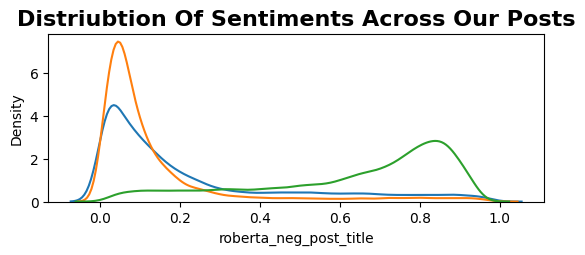

In [8]:
plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Our Posts',fontsize=16,fontweight='bold')
sns.kdeplot(df['roberta_neg_post_title'],bw_method=0.1)
sns.kdeplot(df['roberta_pos_post_title'],bw_method=0.1)
sns.kdeplot(df['roberta_neu_post_title'],bw_method=0.1)

plt.show()

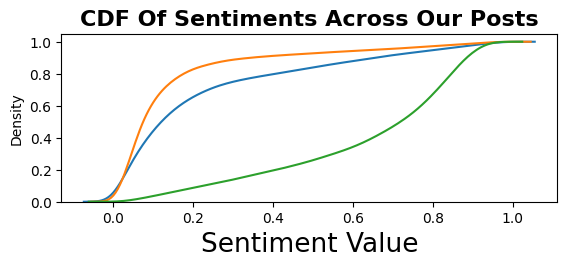

In [9]:
plt.subplot(2,1,2)
plt.title('CDF Of Sentiments Across Our Posts',fontsize=16,fontweight='bold')
sns.kdeplot(df['roberta_neg_post_title'],bw_method=0.1,cumulative=True)
sns.kdeplot(df['roberta_pos_post_title'],bw_method=0.1,cumulative=True)
sns.kdeplot(df['roberta_neu_post_title'],bw_method=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.show()

Observation: Apparently, The dominant sentiment among the Reddit post titles is by far neutral. Even more, there is a probability of 70% that a post title is classified to be completely neutral.

In [10]:
#Sorting And Feature Engineering
f_data = df.sort_values(by='post_timestamp')
ft_data=f_data.copy()
ft_data = ft_data.rename(columns={'post_timestamp':'date'})
ft_data['year']         = pd.DatetimeIndex(ft_data['date']).year
ft_data['month']        = pd.DatetimeIndex(ft_data['date']).month
ft_data['day']          = pd.DatetimeIndex(ft_data['date']).day
ft_data['day_of_year']  = pd.DatetimeIndex(ft_data['date']).dayofyear
ft_data['quarter']      = pd.DatetimeIndex(ft_data['date']).quarter
ft_data['season']       = ft_data.month%12 // 3 + 1

In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [12]:
ft_data = ft_data.groupby(by='date').mean(numeric_only=True).reset_index()

In [13]:
b_date_mean = ft_data.groupby(by='date').mean().reset_index()
b_date_std = ft_data.groupby(by='date').std().reset_index()


fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Average Positive Sentiment',  'Daily Average Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['roberta_pos_post_title'],name='Positive Sentiment Mean'),
    row=1, col=1
)

    
#positive mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['roberta_pos_post_title'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['roberta_pos_post_title'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean'
)




fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['roberta_neg_post_title'],name='Negative Sentiment Mean'),
    row=2, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['roberta_neg_post_title'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['roberta_neg_post_title'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)


fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Average Change With Time")

fig.show()

Observation: It can be observed that with time both the average postive and negative sentiments show a stable behavior.

In [14]:
ft_data.head()
ft_data.columns
ft_data = ft_data.drop('date', axis=1)

In [15]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',  'Spearman Correaltion'))
colorscale=     [[1.0              , "rgb(165,0,38)"],
                [0.8888888888888888, "rgb(215,48,39)"],
                [0.7777777777777778, "rgb(244,109,67)"],
                [0.6666666666666666, "rgb(253,174,97)"],
                [0.5555555555555556, "rgb(254,224,144)"],
                [0.4444444444444444, "rgb(224,243,248)"],
                [0.3333333333333333, "rgb(171,217,233)"],
                [0.2222222222222222, "rgb(116,173,209)"],
                [0.1111111111111111, "rgb(69,117,180)"],
                [0.0               , "rgb(49,54,149)"]]

s_val =ft_data.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1,colorscale=colorscale),
    row=1, col=1
)


s_val =ft_data.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1,colorscale=colorscale),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Locations That Contribute The Most To Our Cut-Offs")
fig.show()

Observations: 
- roberta_compound_post_title and roberta_compound_post_body have strong correlations, likely indicating consistency between sentiment measures in titles and bodies of posts.
- Seasonal or temporal features (like season, day_of_year, and month) have minimal correlation with other variables
- Longer words may suggest more complex or formal language, which can sometimes carry a neutral or slightly positive sentiment

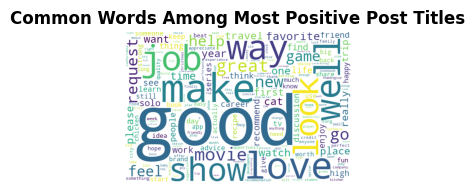

In [16]:
Most_Positive = df[df['roberta_pos_post_title'].between(0.4,1)]['post_title']
Most_Negative = df[df['roberta_neg_post_title'].between(0.25,1)]['post_title']

Most_Positive_text = ' '.join(Most_Positive)
Most_Negative_text = ' '.join(Most_Negative)


pwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(Most_Positive_text)
nwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(Most_Negative_text)

plt.subplot(1,2,1)
plt.title('Common Words Among Most Positive Post Titles',fontsize=12,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.show()

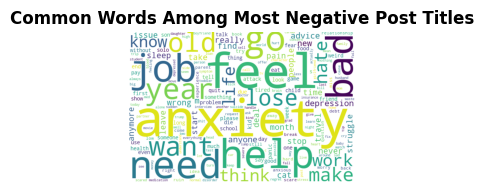

In [17]:

plt.subplot(1,2,2)
plt.title('Common Words Among Most Negative Post Titles',fontsize=12,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

#### Post_body analysis

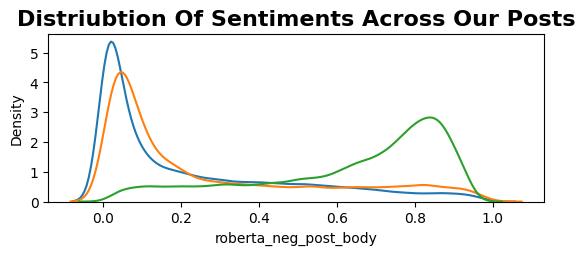

In [18]:
plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Our Posts',fontsize=16,fontweight='bold')
sns.kdeplot(df['roberta_neg_post_body'],bw_method=0.1)
sns.kdeplot(df['roberta_pos_post_body'],bw_method=0.1)
sns.kdeplot(df['roberta_neu_post_title'],bw_method=0.1)

plt.show()

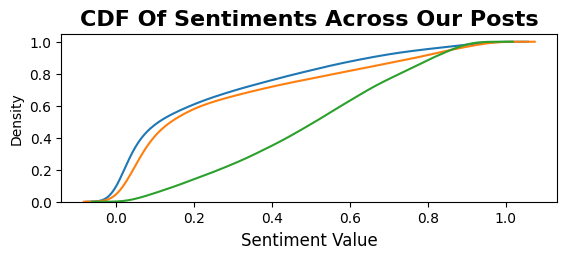

In [19]:
plt.subplot(2,1,2)
plt.title('CDF Of Sentiments Across Our Posts',fontsize=16,fontweight='bold')
sns.kdeplot(df['roberta_neg_post_body'],bw_method=0.1,cumulative=True)
sns.kdeplot(df['roberta_pos_post_body'],bw_method=0.1,cumulative=True)
sns.kdeplot(df['roberta_neu_post_body'],bw_method=0.1,cumulative=True)

plt.xlabel('Sentiment Value',fontsize=12)
plt.show()

Observation: Apparently, Neutral sentiment posts, have a higher density in the mid-range, showing a tendency towards neutrality in the dataset.
Neutral posts are often mildly positive or slightly negative, while positive and negative posts have more distinct sentiment concentrations on either end of the scale.

In [20]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Average Positive Sentiment',  'Daily Average Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['roberta_pos_post_body'],name='Positive Sentiment Mean'),
    row=1, col=1
)

    
#positive mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['roberta_pos_post_body'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['roberta_pos_post_body'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean'
)




fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['roberta_neg_post_body'],name='Negative Sentiment Mean'),
    row=2, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['roberta_neg_post_body'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['roberta_neg_post_body'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)


fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Average Change With Time")

fig.show()

Observation: Negative sentment in posts shows a noticible increase starting from August 2024

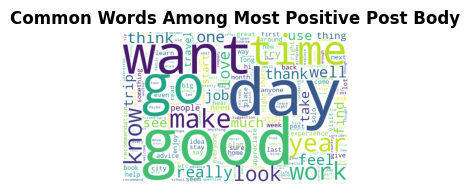

In [24]:
Most_Positive = df[df['roberta_pos_post_body'].between(0.4,1)]['post_body']
Most_Negative = df[df['roberta_neg_post_body'].between(0.25,1)]['post_body']

Most_Positive_text = ' '.join(Most_Positive)
Most_Negative_text = ' '.join(Most_Negative)


pwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(Most_Positive_text)
nwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(Most_Negative_text)

plt.subplot(1,2,1)
plt.title('Common Words Among Most Positive Post Body',fontsize=12,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.show()

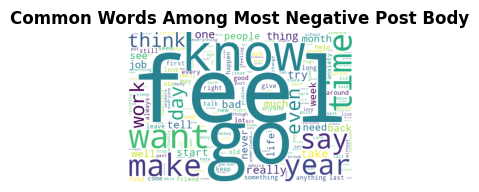

In [23]:

plt.subplot(1,2,2)
plt.title('Common Words Among Most Negative Post Body',fontsize=12,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

### Conclusions
Based on the sentiment analysis done, we learned that;
- The dominant sentiment of collected posts from over 50 subreddits is neutral.
- The sentiments of both bodies and titles is not stationary over our timeline and it seems there is an increase in the negatvitiy of the posts.
- There are slight correlations between naive text features such as number of stops words and the overal number of words to the sentiment of the text.
- We observed that when transforming the post bodies into count vectors and projecting them on to a 2D axis (using dimensionality reduction via ISOMAP), most of the texts fall on a linear line whiles text related to 'sec' and 'app' tagged organizations appear to be very far away from that line which may potentially indicate anomalous texts or topics which need further investigation.